In [ ]:
import cv2 
import numpy as np
import glob,os
from PIL import Image
    

import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
def folder_images(path):
    images = []
    for filename in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
path= '/content/drive/MyDrive/MINI_MIAS/normal_cases'
original_images = folder_images(path)
print('number of images : ',len(original_images))
print('resolution of images : ',original_images[0].shape)

100%|██████████| 207/207 [00:05<00:00, 35.62it/s]

number of images :  207
resolution of images :  (1024, 1024, 3)


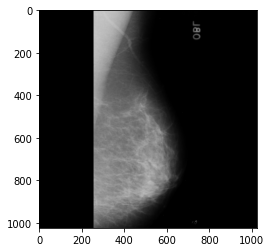

In [ ]:
plt.imshow(original_images[0],cmap='gray')

100%|██████████| 207/207 [00:00<00:00, 1328.77it/s]

207 (1024, 1024)


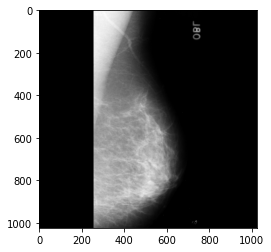

In [ ]:
def original_gray(original):  #function to convert images from bgr to grayscale
    gray_img = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
    return gray_img
gray_images = [] #oringinal/base mammogram images 
for img in tqdm(original_images): 
    gray_images.append(original_gray(img))    

print(len(gray_images),gray_images[0].shape)
plt.imshow(gray_images[0], cmap='gray')

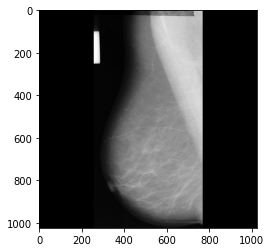

In [ ]:
plt.imshow(gray_images[12],cmap='gray')

In [ ]:
def arti_removal(gray_img):
    hh,ww = gray_img.shape[:2]
    thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_OTSU)[1] 
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    morph = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

    contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    mask = np.zeros((hh,ww), dtype=np.uint8)
    cv2.drawContours(mask, [big_contour], 0, 255, cv2.FILLED)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55,55))
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

    result = cv2.bitwise_and(img, img, mask=mask)
    
    return result
    

100%|██████████| 207/207 [00:16<00:00, 12.21it/s]


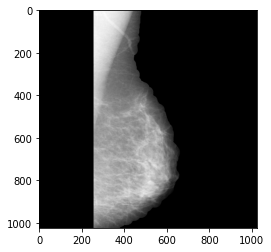

In [ ]:
result_images = []
for img in tqdm(gray_images):
    result_images.append(arti_removal(img))

plt.imshow(result_images[0],cmap='gray')

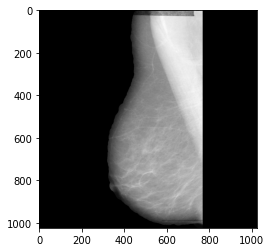

In [ ]:
plt.imshow(result_images[12],cmap='gray')

100%|██████████| 207/207 [00:00<00:00, 1054.59it/s]


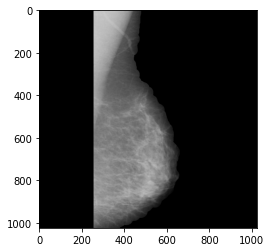

In [ ]:
def gray2bgr(image):
  bgr = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  return bgr

bgr_images = []
for img in tqdm(result_images):
  bgr_images.append(gray2bgr(img))

plt.imshow(bgr_images[0],cmap='gray')

100%|██████████| 207/207 [00:00<00:00, 843.08it/s]


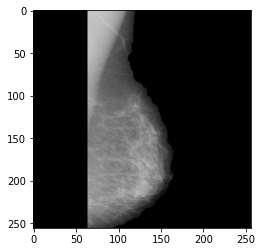

In [ ]:
def resize(image):
  resized = cv2.resize(image, (256, 256))
  return resized
resized_images = []
for img in tqdm(bgr_images):
  resized_images.append(resize(img))

plt.imshow(resized_images[0],cmap='gray')  
  

100%|██████████| 207/207 [00:00<00:00, 9966.61it/s]


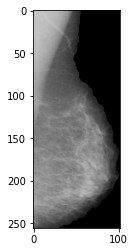

In [ ]:

def crop(image):  
 
      #image = cv2.imread(image,0) #bgr image
      image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
      thresh = cv2.threshold(image_gray, 0 , 255, cv2.THRESH_BINARY)[1] 
      x, y, w, h = cv2.boundingRect(thresh) # find the bounding rectangle of nonzero points in the image
      crop_img = image[y:y+h, x:x+w,:] 
      return crop_img

cropped_images = []
for img in tqdm(resized_images):
  cropped_images.append(crop(img))

plt.imshow(cropped_images[0],cmap='gray')





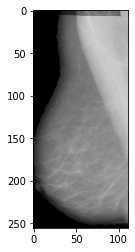

In [ ]:
plt.imshow(cropped_images[12],cmap='gray')

In [ ]:
'''#new_path = '/content/drive/MyDrive/MINI_MIAS/cropped_malignant'
#for i in original_f:
i=0
for img in tqdm(resized_images):
    image = cv2.imwrite('/content/drive/MyDrive/cropped_mini_mias/cropped_malignant/{}.jpg'.format(i),img) 
    i=i+1'''

"#new_path = '/content/drive/MyDrive/MINI_MIAS/cropped_malignant'\n#for i in original_f:\ni=0\nfor img in tqdm(resized_images):\n    image = cv2.imwrite('/content/drive/MyDrive/cropped_mini_mias/cropped_malignant/{}.jpg'.format(i),img) \n    i=i+1"

In [ ]:

i=0
for img in tqdm(cropped_images):
    image = cv2.imwrite('/content/drive/MyDrive/cropped_mini_mias/cropped_normal_resized/{}.jpg'.format(i),img) 
    i=i+1

100%|██████████| 207/207 [00:01<00:00, 137.32it/s]


In [ ]:
def resize(image):
  resized = cv2.resize(image, (256, 256))
  return resized
resized_images = []
for img in tqdm(bgr_images):
  resized_images.append(resize(img))

plt.imshow(resized_images[0],cmap='gray')  
  

In [1]:
def remove_graypx(image):
        binary_mask = image > 80
        restored = image.copy()
        restored[~binary_mask] = 0
        return restored

def padding(image):
        image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        old_image_h, old_image_w, channels = image.shape
        new_image_h = 256
        new_image_w = 256
        colour = (0,0,0)
        result_image = np.full((new_image_h,new_image_w,channels),colour,dtype=np.uint8)
  
        #center offset
        x_center = (new_image_w - old_image_w) // 2
        y_center = (new_image_h - old_image_h) // 2

        #copy image into center of resultant image
        result_image[y_center:y_center + old_image_h, x_center:x_center + old_image_w] = image  

        #resize image to 256x256
        padded_resized = cv2.apply_resize_image(result_image, (256, 256))

        return padded_resized



In [ ]:
def run(image):
  nongray_img = remove_graypx(image)
  padded_img = padding(nongray_img)
  return padded_img